In [38]:
#import all the required libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [39]:
#load the dataset 
df=pd.read_csv('../input/StudentsPerformance.csv')
#check the first 5 values of the data set
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [41]:
#check if there is any null value
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

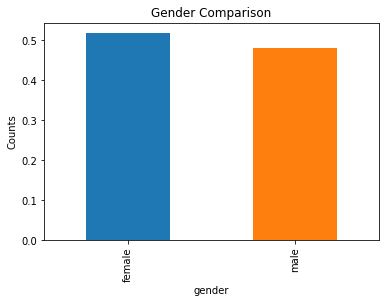

In [42]:
#visuzlaing the gender
df['gender'].value_counts(normalize=True).plot.bar()
plt.title('Gender Comparison')
plt.xlabel('gender')
plt.ylabel('Counts')
plt.show()

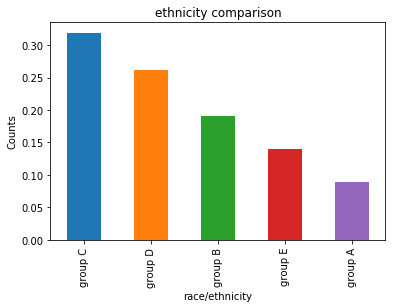

In [43]:
#visualizing the races
df['race/ethnicity'].value_counts(normalize=True).plot.bar()
plt.title('ethnicity comparison')
plt.xlabel('race/ethnicity')
plt.ylabel('Counts')
plt.show()

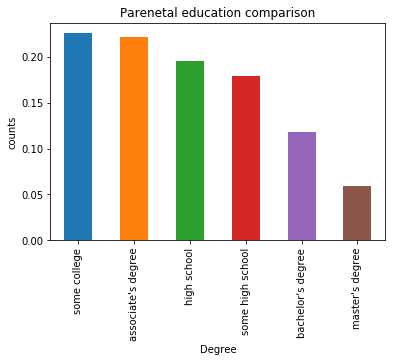

In [44]:
#visualizing the parental level of education
df['parental level of education'].value_counts(normalize=True).plot.bar()
plt.title('Parenetal education comparison')
plt.xlabel('Degree')
plt.ylabel('counts')
plt.show()

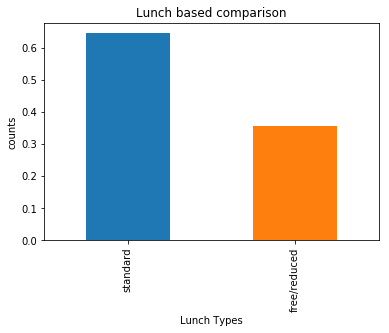

In [45]:
#visualizing the lunch provided
df['lunch'].value_counts(normalize=True).plot.bar()
plt.title('Lunch based comparison')
plt.xlabel('Lunch Types')
plt.ylabel('counts')
plt.show()

In [46]:
#copy the data set before adding more columns
df1= df.copy()

In [47]:
#checking the maximum of each subject
max(df1['math score'])

100

In [48]:
max(df1['reading score'])

100

In [49]:
max(df1['writing score'])

100

In [50]:
#assuming that each subject maximum marks is 100 and calculate the 40% percent of marks as passing_marks
passing_marks= (40/100*100)
passing_marks

40.0

In [51]:
#students passed in maths
df1['passed_in_maths']= np.where(df['math score']<passing_marks, 'F', 'P')
df1['passed_in_maths'].value_counts()

P    960
F     40
Name: passed_in_maths, dtype: int64

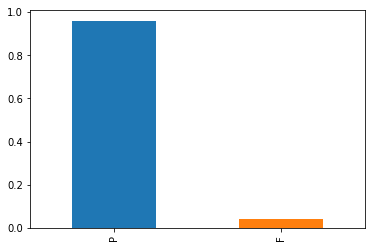

In [52]:
#visualization of studetns passed in maths
df1['passed_in_maths'].value_counts(normalize=True).plot.bar()

In [53]:
#students passed in reading 
df1['passed_in_reading']= np.where(df['reading score']<passing_marks, 'F', 'P')
df1['passed_in_reading'].value_counts()

P    974
F     26
Name: passed_in_reading, dtype: int64

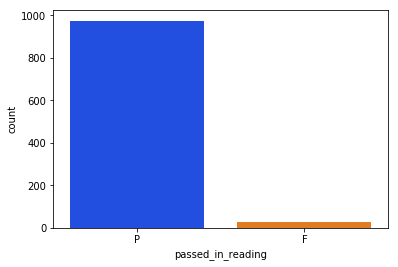

In [55]:
#visualization of students passed in reading
sns.countplot(x=df1['passed_in_reading'], data=df1, palette='bright')

In [56]:
#students passed in writing
df1['passed_in_writing']= np.where(df['writing score']<passing_marks, 'F', 'P')
df1['passed_in_writing'].value_counts()

P    968
F     32
Name: passed_in_writing, dtype: int64

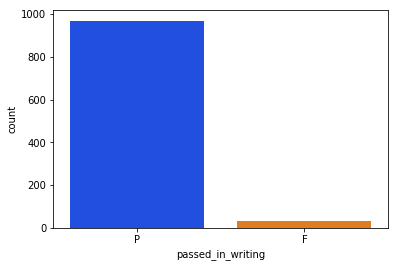

In [57]:
#visualization of students passed in writing
sns.countplot(x=df1['passed_in_writing'], data=df1, palette='bright')

In [58]:
#Overall passing students in all subjects
df1['overall_pass'] = df1.apply(lambda x : 'P' if x['passed_in_maths'] == 'P' and x['passed_in_reading'] == 'P' and x['passed_in_writing'] == 'P' else 'F', axis =1)
df1['overall_pass'].value_counts()

P    949
F     51
Name: overall_pass, dtype: int64

In [59]:
#check how overall number of passing students depends on gender
Gender=pd.crosstab(df1['gender'], df1['overall_pass'])
Gender

overall_pass,F,P
gender,,
female,31,487
male,20,462


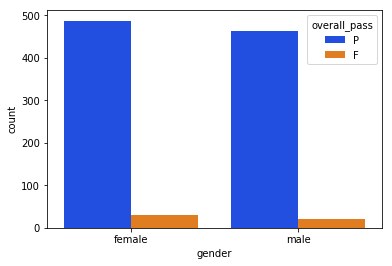

In [60]:
#visualization of gender vs students passed
sns.countplot(x='gender', data=df1, hue='overall_pass', palette='bright')

In [61]:
#check how race affects the overall students passed
race=pd.crosstab(df1['race/ethnicity'], df1['overall_pass'])
race

overall_pass,F,P
race/ethnicity,,
group A,6,83
group B,13,177
group C,18,301
group D,10,252
group E,4,136


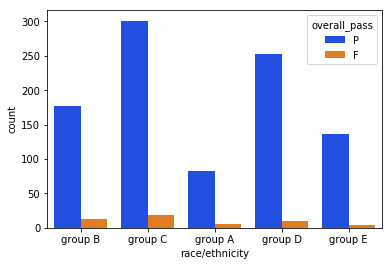

In [62]:
#visualization of race vs overall students passed
sns.countplot(x='race/ethnicity', data=df1, hue='overall_pass', palette='bright')

In [63]:
#check how parental education controls the passing of students
parental_education=pd.crosstab( df1['parental level of education'], df1['overall_pass'] )
parental_education

overall_pass,F,P
parental level of education,,
associate's degree,5,217
bachelor's degree,4,114
high school,16,180
master's degree,0,59
some college,10,216
some high school,16,163


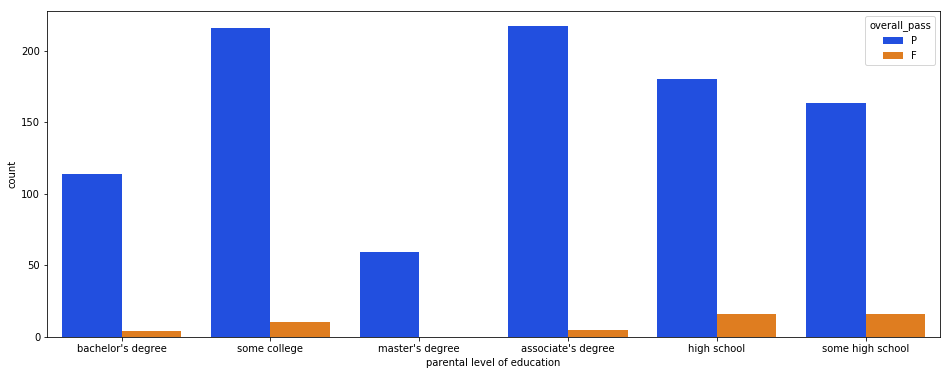

In [64]:
#visualization of parental level of education and overall passing students
plt.figure(figsize=(16,6))
sns.countplot(x='parental level of education', data=df1, hue='overall_pass', palette='bright')

In [65]:
#check how lunch controls the passing of students
lunch=pd.crosstab( df1['lunch'], df1['overall_pass'] )
lunch

overall_pass,F,P
lunch,,
free/reduced,39,316
standard,12,633


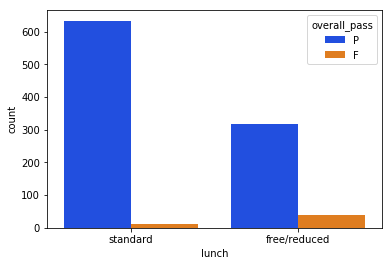

In [66]:
#visualization of lunch and overall students passed. 
sns.countplot(x='lunch', data=df1, hue='overall_pass', palette='bright')

In [67]:
#check how test preparation course affects the passing of students
test_preparation_course=pd.crosstab( df1['lunch'], df1['overall_pass'] )
test_preparation_course

overall_pass,F,P
lunch,,
free/reduced,39,316
standard,12,633


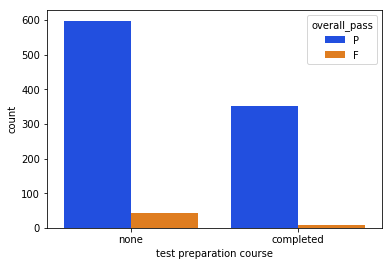

In [68]:
#visualizaing the relation between test preparation course and overall passed students
sns.countplot(x='test preparation course', data=df1, hue='overall_pass', palette='bright')

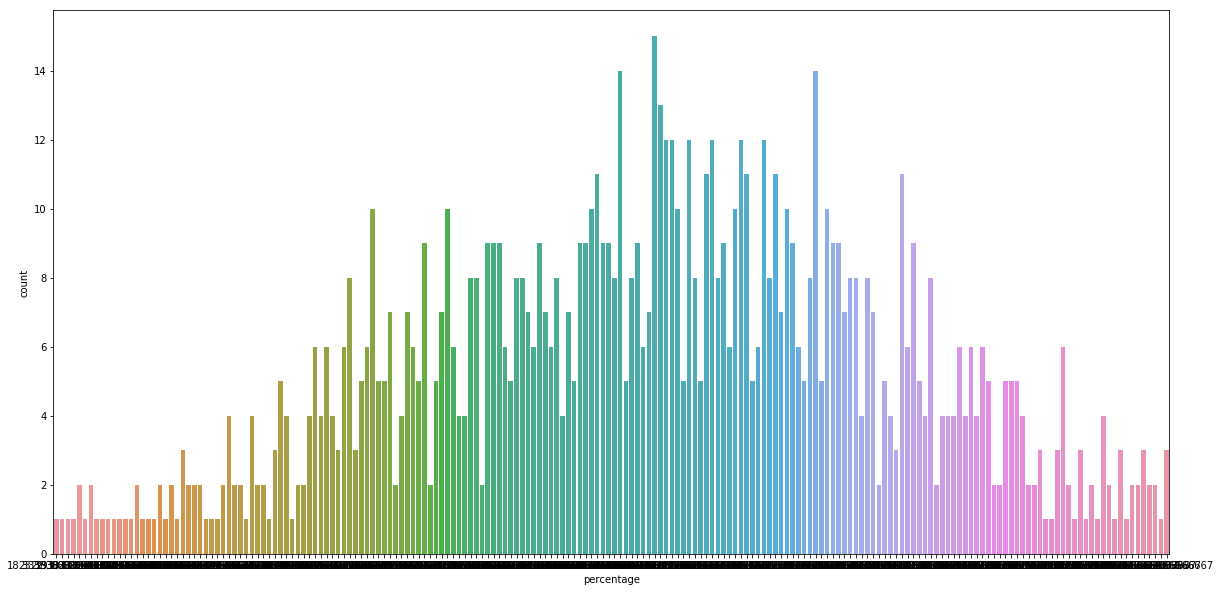

In [69]:
#getting total number of marks and plotting on graph
df1['total_marks']= df1['math score']+df1['reading score']+ df1['writing score']
df1['percentage'] = df1['total_marks']/3
plt.figure(figsize=(20,10))
sns.countplot(x='percentage', data=df1)

In [70]:
#function to specify the grade on the basis of percentage obtained.
def Grading(percentage, overall_pass):
        
    if ( percentage >= 80 ):
        return 'A'
    if ( percentage >= 70):
        return 'B'
    if ( percentage >= 60):
        return 'C'
    if ( percentage >= 50):
        return 'D'
    if ( percentage >= 40):
        return 'E'
    if ( overall_pass == 'F'):
        return 'F'
    else: 
        return 'F'

df1['grade'] = df1.apply(lambda x : Grading(x['percentage'], x['overall_pass']), axis=1)

In [71]:
#Check the how many students fall in which grade
df1['grade'].value_counts().sort_index()

A    198
B    261
C    256
D    182
E     73
F     30
Name: grade, dtype: int64

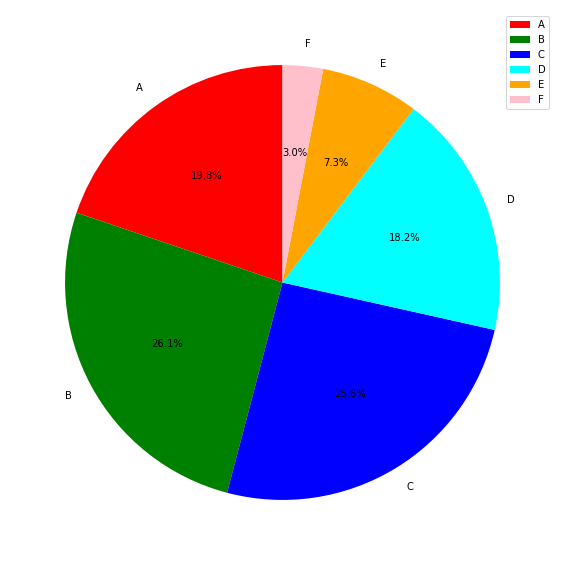

In [72]:
#plotting the students performance on pie chart to visualize easily. 
plt.figure(figsize= (20,10))
labels = ['A', 'B', 'C', 'D', 'E', 'F']
numbers= [198, 261, 256, 182, 73, 30]
colors= ['Red', 'Green', 'Blue', 'cyan', 'orange', 'pink']
plt.pie(numbers, labels=labels, colors=colors,startangle=90,autopct='%.1f%%')
plt.legend(labels)
plt.show()
